Importing Dependencies

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import  TfidfVectorizer
from textblob import TextBlob

In [62]:
file_path=("tweets.csv")
df=pd.read_csv(file_path)

In [63]:
df.head()

,Tweet_count,Username,Location,Created At,Likes,Text
0,1,Hustler,"🇦🇷,🇦🇺",Wed Dec 11 11:26:01 +0000 2024,3366,"""Mom, he won IPL with ₹50L Rahane""😂 https://t...."
1,2,𝙍`𝙎𝙖𝙢,Rocket Raja Rutu 👑,Tue Dec 10 14:13:31 +0000 2024,375,"""Coming for IPL 2025""👑\nKaththi BGM Edit ft. C..."
2,3,Cricket ka kachra IPL,NaN,Wed Dec 11 12:46:11 +0000 2024,11,Fair enough welcome back Sachin Tendulkar 🙏\nh...
3,4,Johns,NaN,Tue Dec 10 18:33:36 +0000 2024,2835,Babar Azam spent 15 minutes adjusting the sigh...
4,5,Vinay,NaN,Tue Dec 10 16:23:59 +0000 2024,971,"As I promised, BHUVI's last 2 years all IPL W..."


In [64]:
df.shape

(3959, 6)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet_count  3959 non-null   int64 
 1   Username     3959 non-null   object
 2   Location     2585 non-null   object
 3   Created At   3959 non-null   object
 4   Likes        3959 non-null   int64 
 5   Text         3959 non-null   object
dtypes: int64(2), object(4)
memory usage: 185.7+ KB


In [66]:
df.isnull().sum()

Tweet_count       0
Username          0
Location       1374
Created At        0
Likes             0
Text              0
dtype: int64

In [67]:
df['Location'] = df['Location'].ffill()

In [68]:
df['Created At'] = pd.to_datetime(df['Created At'], format='%a %b %d %H:%M:%S %z %Y')

df['Month'] = df['Created At'].dt.month_name()  
df['Year'] = df['Created At'].dt.year

df=df.drop(columns=['Tweet_count','Created At'])

In [69]:
df = df[df['Year'].isin([2024])]
df = df[df['Month'].isin(['December'])]

In [70]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nikhil
[nltk_data]     G\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [72]:
port_stem=PorterStemmer()

In [73]:
# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002700-\U000027BF"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Remove URLs
def remove_url(text):
    return re.sub(r"http\S+|www\S+|https\S+", "", text)

# Remove special characters
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def clean_text(text):
    text = remove_emojis(text)
    text = text.lower()
    text = remove_url(text)
    text = remove_special_chars(text)
    text = remove_extra_spaces(text)  # Remove extra spaces
    return text



df['cleaned_text'] = df['Text'].apply(clean_text)

In [74]:
new_order = ['Username','Location',  'Month', 'Year','Likes','Text','cleaned_text']
df = df[new_order]

In [75]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])
vectorizer.get_feature_names_out()


array(['10', '10 ipl', '10 lsg', ..., 'youtube', 'yr', 'zero'],
      dtype=object)

In [76]:
df['polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [77]:
df.head()

,Username,Location,Month,Year,Likes,Text,cleaned_text,polarity,sentiment
0,Hustler,"🇦🇷,🇦🇺",December,2024,3366,"""Mom, he won IPL with ₹50L Rahane""😂 https://t....",mom he won ipl with 50l rahane,0.000,neutral
1,𝙍`𝙎𝙖𝙢,Rocket Raja Rutu 👑,December,2024,375,"""Coming for IPL 2025""👑\nKaththi BGM Edit ft. C...",coming for ipl 2025 kaththi bgm edit ft conway,0.000,neutral
2,Cricket ka kachra IPL,Rocket Raja Rutu 👑,December,2024,11,Fair enough welcome back Sachin Tendulkar 🙏\nh...,fair enough welcome back sachin tendulkar,0.375,positive
3,Johns,Rocket Raja Rutu 👑,December,2024,2835,Babar Azam spent 15 minutes adjusting the sigh...,babar azam spent 15 minutes adjusting the sigh...,-0.400,negative
4,Vinay,Rocket Raja Rutu 👑,December,2024,971,"As I promised, BHUVI's last 2 years all IPL W...",as i promised bhuvis last 2 years all ipl wick...,0.000,neutral


Data Visualizations

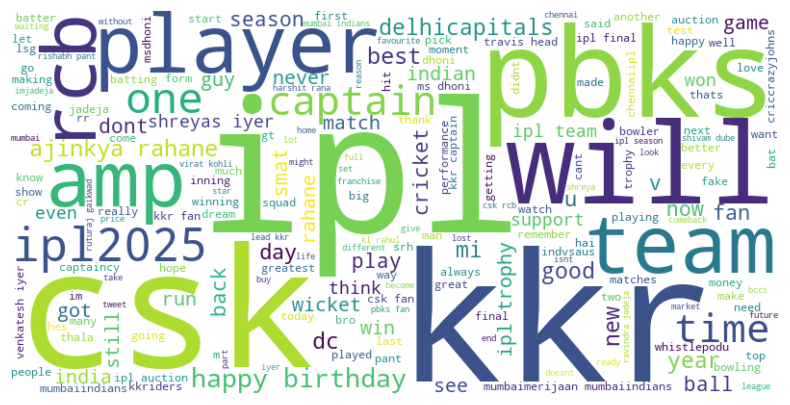

In [78]:
from wordcloud import WordCloud
text = " ".join(tweet for tweet in df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


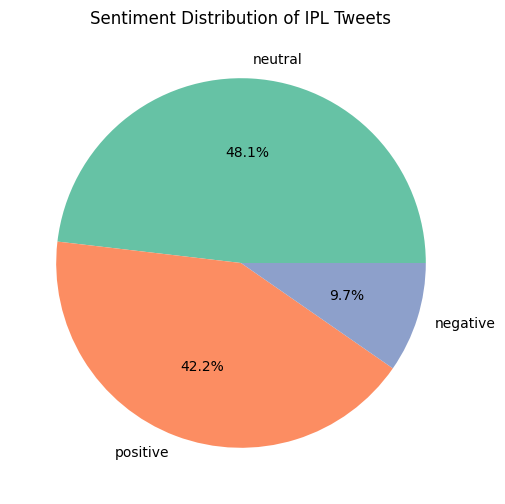

In [79]:
# Sentiment distribution pie chart
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(sentiment_counts)))
plt.title('Sentiment Distribution of IPL Tweets')
plt.show()


C:\Users\Nikhil G\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nikhil G\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nikhil G\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


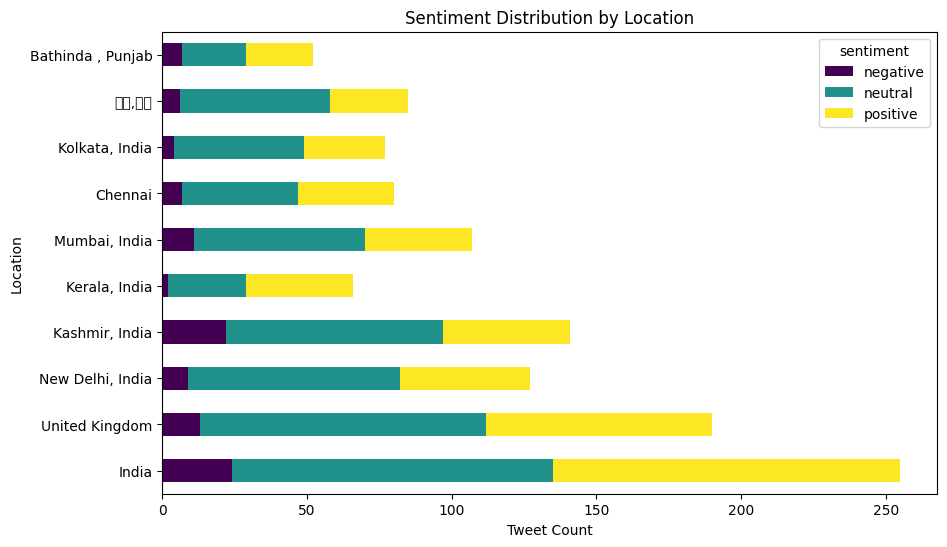

In [80]:
# Sentiment distribution by location
location_sentiment = df.groupby(['Location', 'sentiment']).size().unstack(fill_value=0)
location_sentiment = location_sentiment.sort_values(by='positive', ascending=False)  # Sort by positive sentiment count

# Plot the top 10 locations with the highest positive sentiment
location_sentiment.head(10).plot(kind='barh', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution by Location')
plt.xlabel('Tweet Count')
plt.ylabel('Location')
plt.show()


C:\Users\Nikhil G\AppData\Local\Temp\ipykernel_4392\1513406917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='Likes', data=df, palette='Set1')


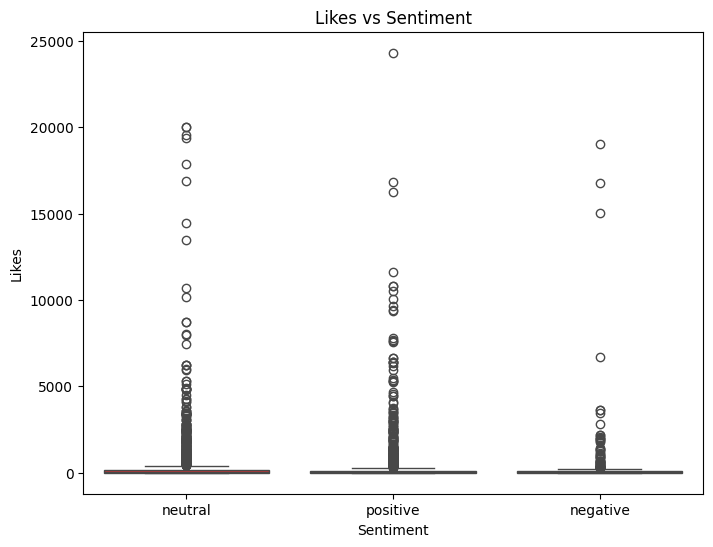

In [81]:
# Scatter plot of Likes vs Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='Likes', data=df, palette='Set1')
plt.title('Likes vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')
plt.show()


Model Taraining

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [83]:
X = tfidf_matrix
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
#logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

    negative       1.00      0.04      0.08        70
     neutral       0.72      0.89      0.80       309
    positive       0.78      0.77      0.77       270

    accuracy                           0.75       649
   macro avg       0.83      0.57      0.55       649
weighted avg       0.77      0.75      0.71       649

0.7457627118644068


In [85]:
#RandomForestClassifier
model_rf= RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    negative       1.00      0.14      0.25        70
     neutral       0.75      0.92      0.83       309
    positive       0.82      0.79      0.80       270

    accuracy                           0.78       649
   macro avg       0.86      0.62      0.63       649
weighted avg       0.81      0.78      0.75       649

0.7812018489984591


In [86]:
#Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    negative       1.00      0.01      0.03        70
     neutral       0.74      0.78      0.76       309
    positive       0.68      0.80      0.73       270

    accuracy                           0.71       649
   macro avg       0.80      0.53      0.51       649
weighted avg       0.74      0.71      0.67       649

0.7072419106317411


In [87]:
parameters = {
    'C': [0.1, 1, 10,20,30,40,50,55,60,70],
    'max_iter': [100, 200, 300,400,500]
}

grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'C': 50, 'max_iter': 100}


In [88]:
scores = cross_val_score(grid_search, X, y, cv=5)
print(f"Cross-validation accuracy: {scores.mean()}")

Cross-validation accuracy: 0.7960998877665544


In [89]:
print('Logistic Regression Accuracy Score',accuracy_score(y_test, model_lr.predict(X_test)))
print('Random Forest Accuracy Score',accuracy_score(y_test, model_rf.predict(X_test)))
print('Naive Bayes Accuracy Score',accuracy_score(y_test, model_nb.predict(X_test)))
print(f"GridSearchCV Cross-validation accuracy: {scores.mean()}")

Logistic Regression Accuracy Score 0.7457627118644068
Random Forest Accuracy Score 0.7812018489984591
Naive Bayes Accuracy Score 0.7072419106317411
GridSearchCV Cross-validation accuracy: 0.7960998877665544
